# 주성분 분석 

### 차원 
  - 과일 사진 > 10000 개의 픽셀로 구성 > 10000개의 차원 

### 차원 축소 
  - 특성이 많이지면 과대 적합되기 쉬움 
  - 데이터를 가장 잘 설명하는 몇 개의 특성만 남기고 나머지는 제거
  ---> 주성분 분석 (PCA)

### PCA의 원리 
- 데이터의 분산이 큰 방향을 찾는 것 
  - 분산 : 데이터가 얼마나 퍼져 있는지
  - 주성분 : 데이터를 가장 잘 나타내는 벡터 
  - 주성분을 구한 뒤 벡터와 수직 + 분산이 가장 큰 방향을 구함 -> 두번째 주성분 

# PCA 클래스 

In [2]:
import numpy as np 
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1,100*100)

- 비지도 학습이기 때문에 fit을 할 필요가 없음
- 주성분의 수 50개

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
### n:  샘플 갯수 
    n = len(arr)
### rows, cols:  서브플롯의 행과 열 갯수
### 한 줄에 10개씩 그리도록 설정
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10 
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio),squeeze=False)
    for i in range(rows):
        for j in range(cols):
            ### 한 줄에 10개씩 그림
            if i*10 + j < n : 
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

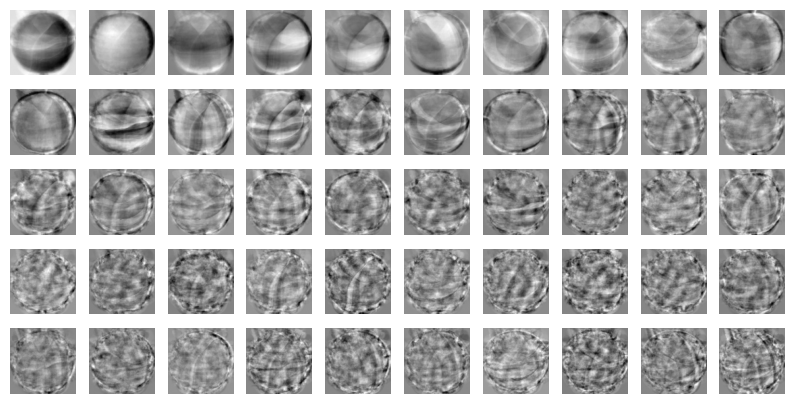

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100))

-  차원을 50개로 줄임 

In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터이 재구성 

`inverse_transform` 을 이용해서 원본데이터를 재구성

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


- 복구 확인>

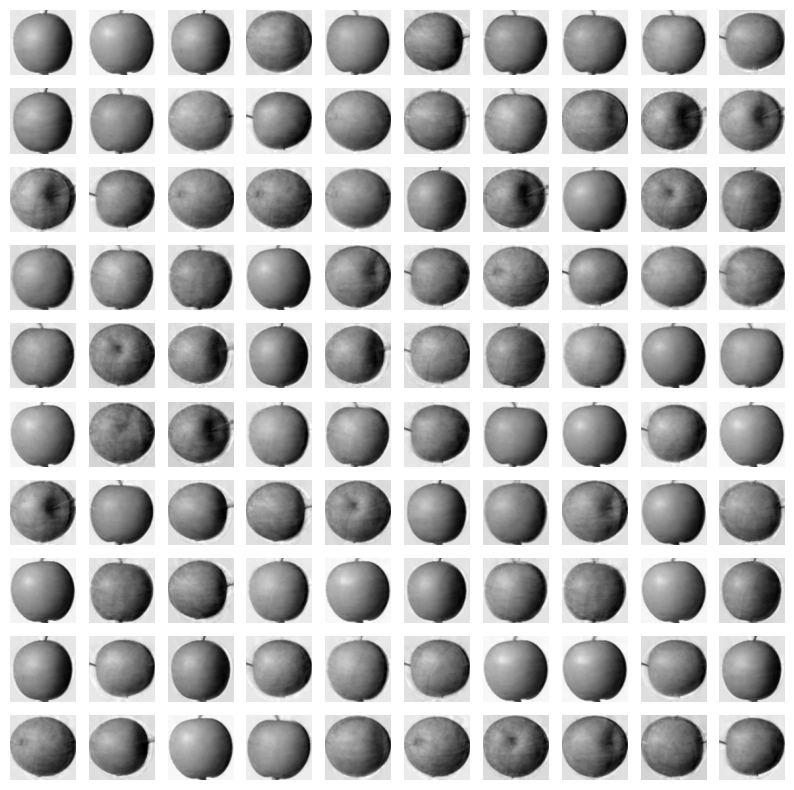

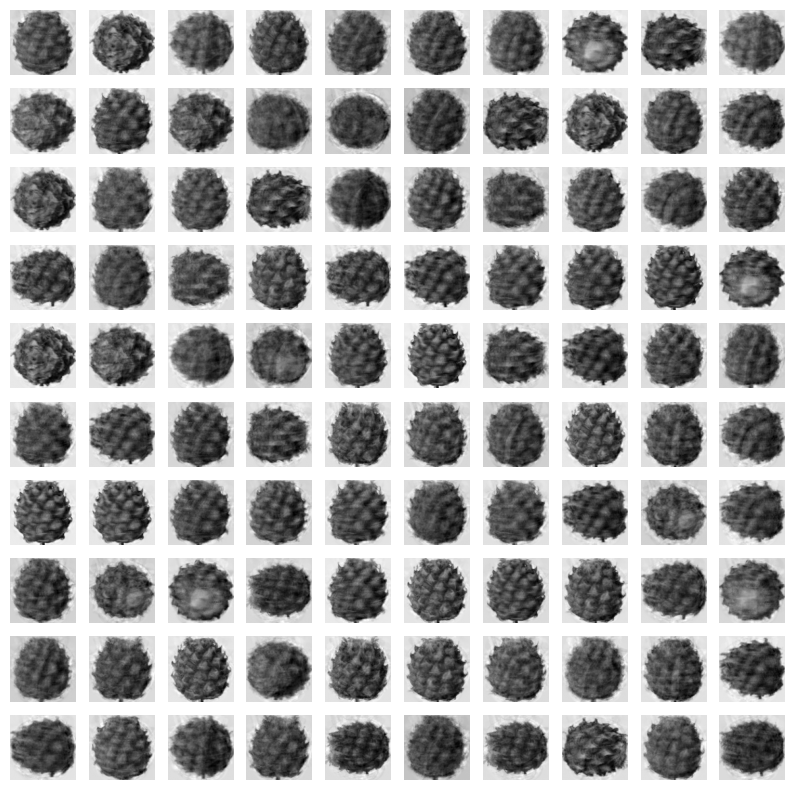

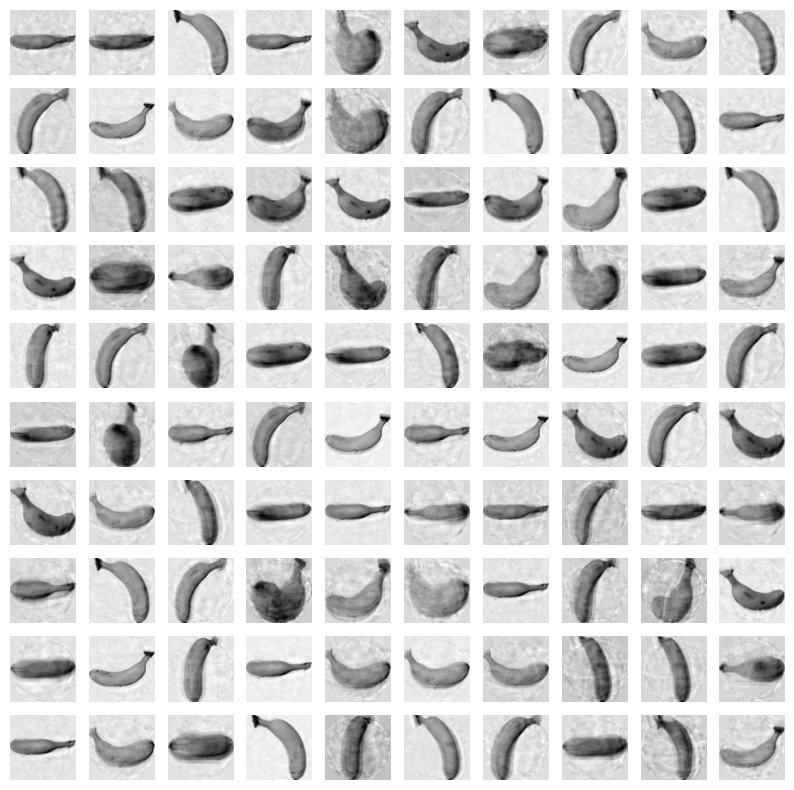

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산
  - 주성분이 얼마나 분산을 잘 표현하는지 
  - PCA에서 `explained_variance_ratio_`로 기록 
  - 분산 : 92%

In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.9215487646707919


- 10개의 주성분이 대다수를 표현

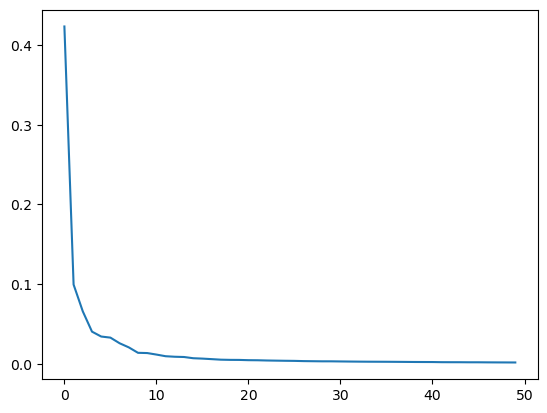

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 다른 알고리즘과 함께 사용 

- PCA로 축소한 데이터와 원본 데이터 사이 차이 확인 

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
### 그림을 그리기 위해 0 100개 1 100개 2 100개 
target = np.array([0]*100 + [1]*100 + [2]*100)

- 전체 데이터 

In [21]:
### 교차 검증 
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.19751353263854982


- PCA 데이터 

In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores["fit_time"]))

0.9933333333333334
0.008800172805786132


- 2개의 특성만으로 분산의 50%를 설명 

In [24]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


- 축소 > 다시 변환 
- 2개의 특성을 이용해서 99% 까지 정확도

In [25]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

### 2개의 특성만으로 검증 
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores["fit_time"]))

(300, 2)
0.99
0.024768257141113283


c:\ProgramData\miniconda3\envs\ml_basic\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\miniconda3\envs\ml_basic\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

- 축소된 차원의 데이터를 이용해서 K평균 알고리즘 이용

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(fruits_pca)
print(np.unique(kmeans.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


c:\ProgramData\miniconda3\envs\ml_basic\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



- 그림으로 표현

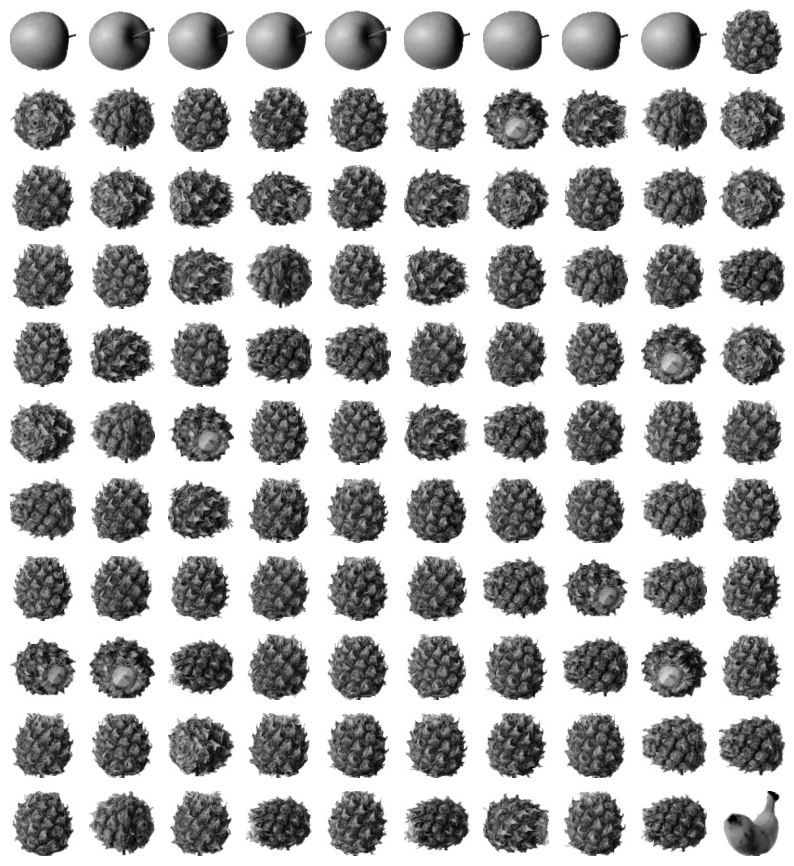

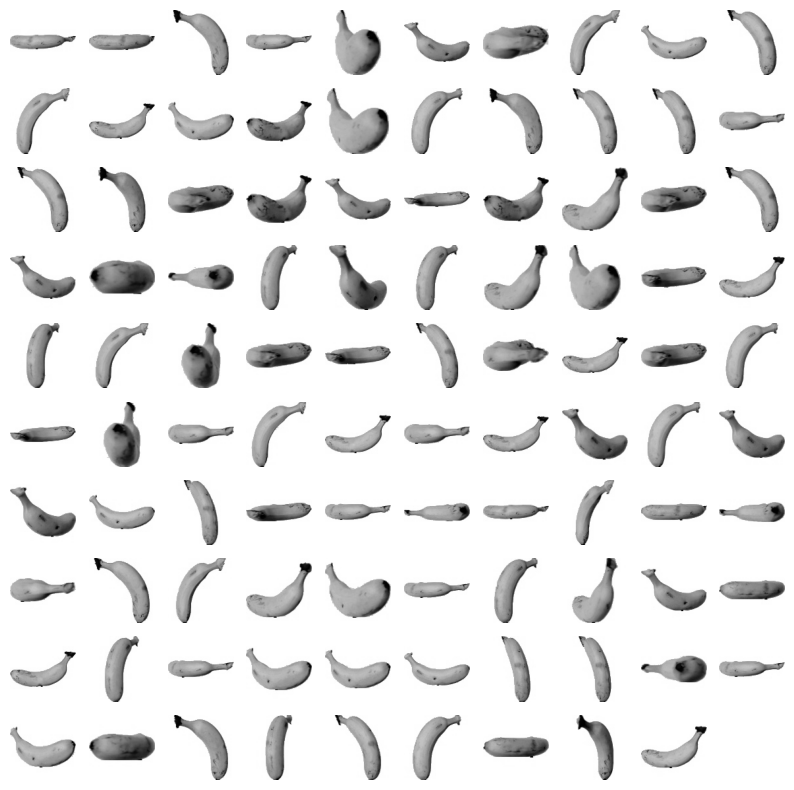

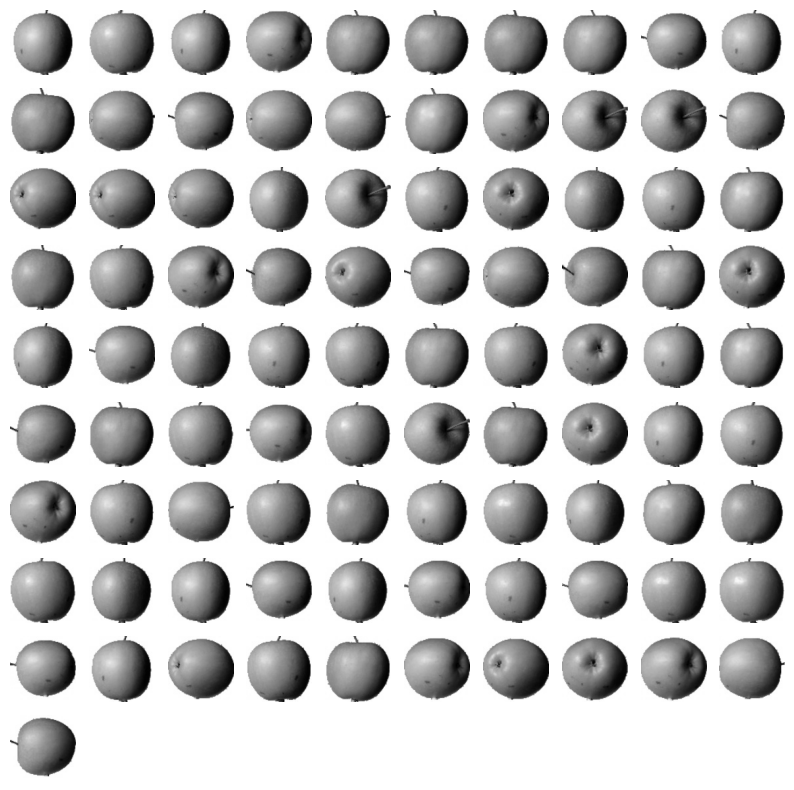

In [27]:
for label in range(0,3):
    draw_fruits(fruits[kmeans.labels_==label])
    print("\n")

- 산점도를 통해 표현

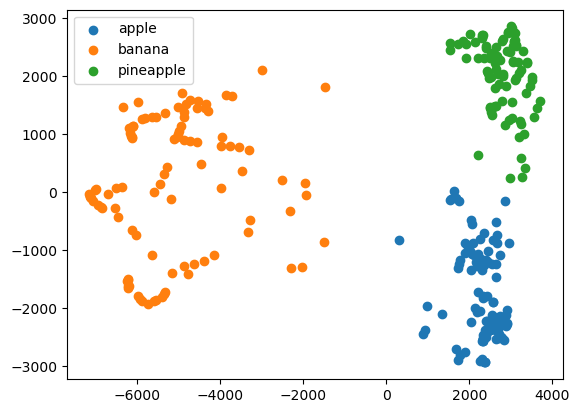

In [ ]:
for label in range(0,3):
    data = fruits_pca[kmeans.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(["apple", "banana", "pineapple"])
plt.show() ##
